In [2]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# magic Jupyter function that allows plots to be interactive.
%matplotlib notebook

In [4]:
#Número de exemplos
M = 1000
#Tamanho do mini-batch
batch_size = int(100)

#Criação de features
x1 = np.random.normal(0, 1, (M,1))
x2 = np.random.normal(0, 1, (M,1))

#Criação de ruído
w = np.random.normal(0,1,(M,1))

#Criação de labels
y = 2*x1 + 2*x2 + w

In [5]:
#Criação de mini-batch
batch_size = 40
bp = np.random.randint(1, 1000, batch_size)

x1_mb = x1[bp]
x2_mb = x2[bp]
y_mb = y[bp]

X_mb = np.c_[x1_mb, x2_mb]

In [6]:
#Criação de pontos para plotar superfície de erro
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )

In [7]:
#Cálculo utilizando a fórmula fechada
X = np.c_[x1, x2]

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

In [8]:
#Criação de variáveis para armazenar histórico de valores
alpha = 0.1
iteration = 0
n_iterations = batch_size
erro = 1

#histórico dos pesos a
a = np.zeros((2,1))
a[0] = -10;
a[1] = -10;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Histórico do valor do erro calculado
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

#Histórico do valor do gradiente calculado
grad_hist = np.zeros((2, n_iterations))

In [9]:
#Implementação do mini-batch

while iteration < n_iterations:
    gradients = -2/batch_size * X_mb.T.dot(y_mb - X_mb.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    Jgd[iteration+1] = (1/batch_size)*sum(np.power( (y_mb - X_mb.dot(a)) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1

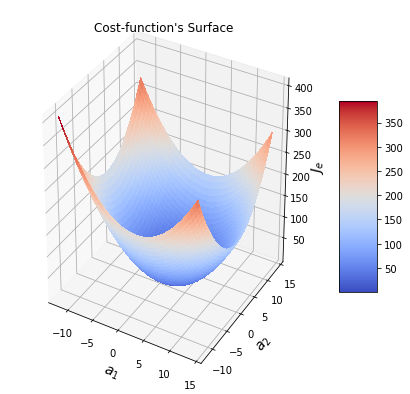

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#Show the plot.
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

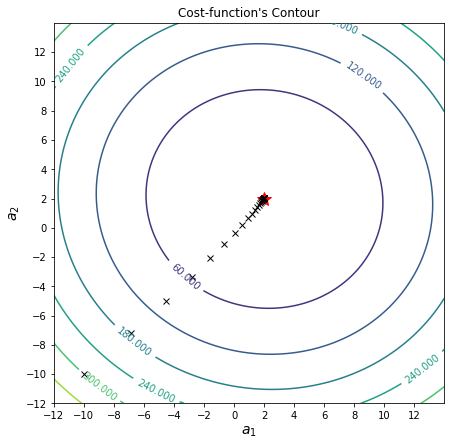

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot figure.        
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

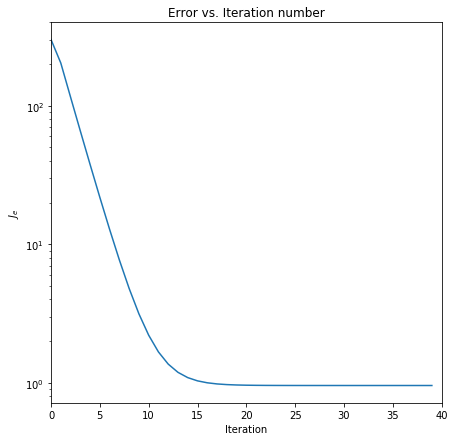

<Figure size 432x288 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [13]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_mb: ' + str(a[0, 0]))
print('a2_mb: ' + str(a[1, 0]))

a1_opt: 2.027787125328225
a2_opt: 1.966397175565213
a1_mb: 1.9928377554750978
a2_mb: 2.0592697467710144


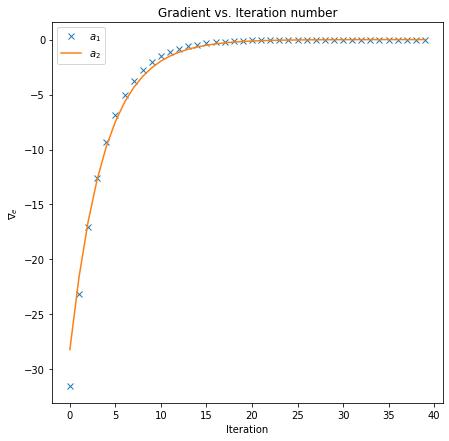

In [14]:
fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, iteration), grad_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, iteration), grad_hist[1,:], label='$a_2$')
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()

In [ ]:
'''
Com relação aos 3 tipos de algoritmos (batch, mini-batch e estocástico), pode-se concluir que todos possuem qualidades
e limitações. 

O algoritmo em batch, apresenta bom resultado final. A convergência ótima no mínimo global, faz com que o algoritmo 
retorne resultados mais precisos. No entanto, tal resultado é oferecido ao preço de maior demanda computacional, o
que pode ser inviável ao considerar conjuntos de treinamentos muito grandes.

O estocástico, por outro lado, apresenta agilidade, ao preço de menor precisão (algoritmo considera um exemplo por 
vez). No entanto, demanda menos recursos computacionais para sua operação.

Por fim, o algoritmo do mini-batch apresenta uma relação de equilíbrio entre a necessidade de recursos computacionais
e a precisão final oferecida. O algoritmo é uma opção eficiente ao se buscar o ponto ótimo entre os requisitos 
mencionados anteriormente. Por fim, deve-se saber mensurar de forma correta o tamanho do mini-batch (algumas 
referências recomendam o tamanho de 10 a 32 exemplos), bem como o do passo de aprendizado.
'''